In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [191]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [192]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [193]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [194]:
df.shape

(2240, 29)

## 1. Data Preprocessing

In [195]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [196]:
# Missing data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [197]:
# only 24 missing data, then drop na
df = df.dropna()

In [198]:
# check duplicates
df.duplicated().sum()

0

In [199]:
#transform year_birth to age
df['age'] = 2023-df['Year_Birth']

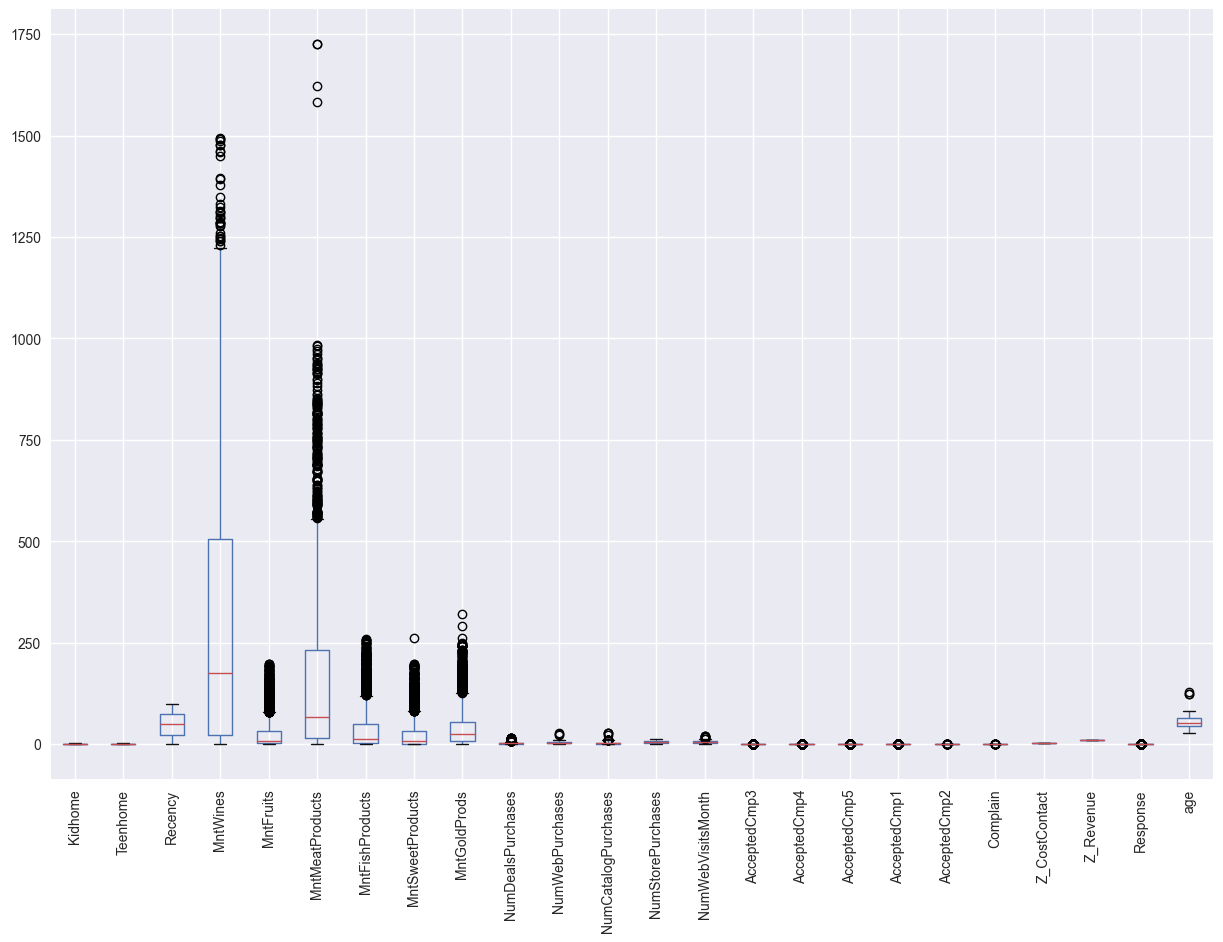

In [200]:
# check for outliers
fig, ax = plt.subplots(figsize=(15, 10))
dfbox = df.drop(['ID','Income','Year_Birth'],axis = 1)
dfbox.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()

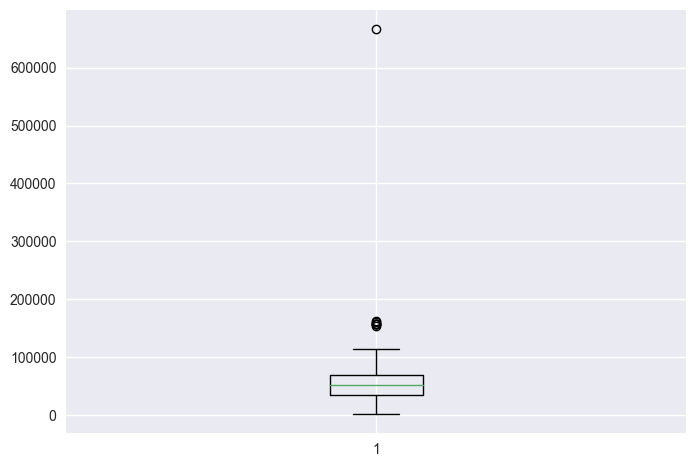

In [201]:
plt.boxplot(df['Income'])
plt.show()

In [202]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [203]:
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [204]:
df.shape

(2208, 30)

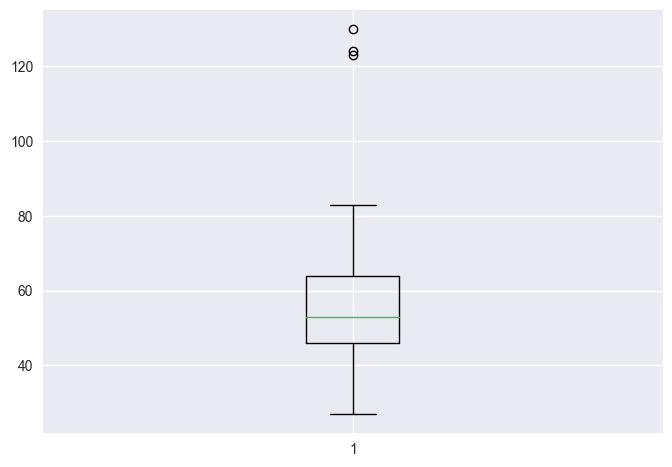

In [205]:
plt.boxplot(df['age'])
plt.show()

In [206]:
# Calculate the IQR for the Income column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the age column:", len(outliers))

Number of outliers in the age column: 3


In [207]:
df = df[~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))]

In [208]:
df.shape

(2205, 30)

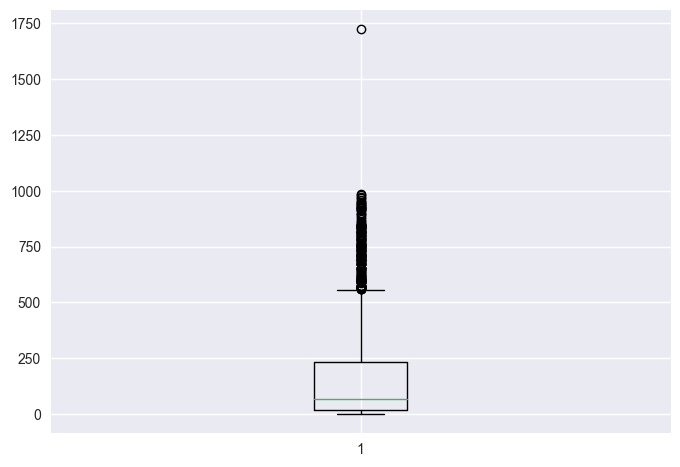

In [209]:
plt.boxplot(df['MntMeatProducts'])
plt.show()

In [210]:
df = df[df['MntMeatProducts']<=1500]
df.shape

(2204, 30)

In [211]:
#Number of accepted campaigns
df['#ofAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

In [212]:
df['#ofAcceptedCmp'].value_counts()

0    1746
1     322
2      81
3      44
4      11
Name: #ofAcceptedCmp, dtype: int64

In [213]:
#Transform Dt_customer
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
current_date = pd.to_datetime("25-02-2023", format="%d-%m-%Y")
df["Dt_Customer_Days"] = (current_date - df["Dt_Customer"]).dt.days

In [214]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', '#ofAcceptedCmp', 'Dt_Customer_Days'],
      dtype='object')

In [215]:
#drop useless column
df1 = df.drop(['ID','Z_CostContact', 'Z_Revenue','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Response','Year_Birth','Dt_Customer'],axis = 1)

In [216]:
df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days'],
      dtype='object')

In [217]:
#Group education in 3 groups
df1['Education'] = df1['Education'].replace({'PhD':'High','Master':'High','Graduation':'High',
                                             '2n Cycle':'Low','Basic':'Middle'})
df1.Education.value_counts()

High      1952
Low        198
Middle      54
Name: Education, dtype: int64

In [218]:
#Group Marital Status in 2 groups
df1['Marital_Status'] = df1['Marital_Status'].replace({'Married':'Together','Single':'Alone','Divorced':'Alone',
                                                       'Widow':'Alone','Absurd':'Alone','YOLO':'Alone'})
df1['Marital_Status'].value_counts()

Together    1421
Alone        783
Name: Marital_Status, dtype: int64

In [219]:
#Whether is parent
df1['is_parent'] = (df1['Kidhome'] + df1['Teenhome'] > 0).astype(int)

In [220]:
#Create RFM columns
df1['Monetary'] = df1['MntWines']+ df1['MntFruits']+ df1['MntMeatProducts']+ df1['MntFishProducts']
+ df1['MntSweetProducts']+ df1['MntGoldProds']
df1['Frequency'] = df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases'] 

In [221]:
df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days', 'is_parent', 'Monetary',
       'Frequency'],
      dtype='object')

## 4. RFM Analysis

In [222]:
dfrfm = df1[['Recency','Monetary','Frequency']]

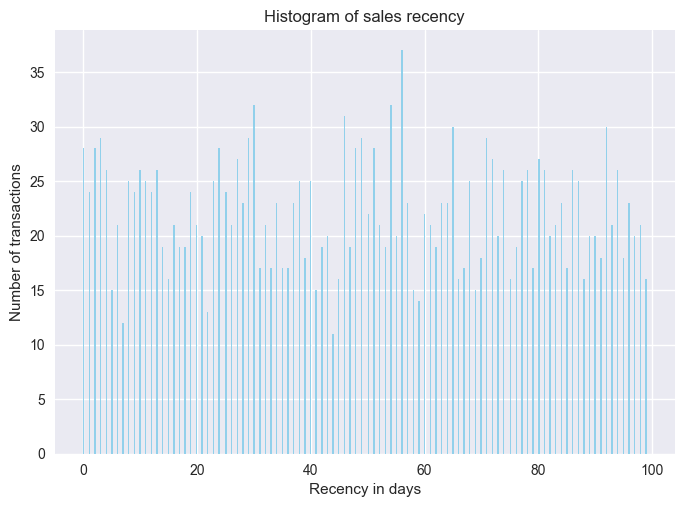

In [223]:
# Recency plot
# The frequency of recency does not depend on its value.
import math
x = dfrfm.Recency
mu = np.mean(dfrfm.Recency)
sigma = math.sqrt(np.var(dfrfm.Recency))
n, bins, patches = plt.hist(x, 400, facecolor='skyblue', alpha=0.9)
plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title(r'Histogram of sales recency')
plt.grid(True)

In [224]:
#scale all RFM values in the range 1-5
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler((1,5))
scaled = min_max_scaler.fit_transform(dfrfm)
rfm_scaled = pd.DataFrame(scaled, columns=dfrfm.columns)
rfm_scaled.head()

Recency  Monetary  Frequency
0  3.343434  3.458120       3.75
1  2.535354  1.029060       1.50
2  2.050505  2.213675       3.50
3  2.050505  1.071795       1.75
4  4.797980  1.644444       2.75

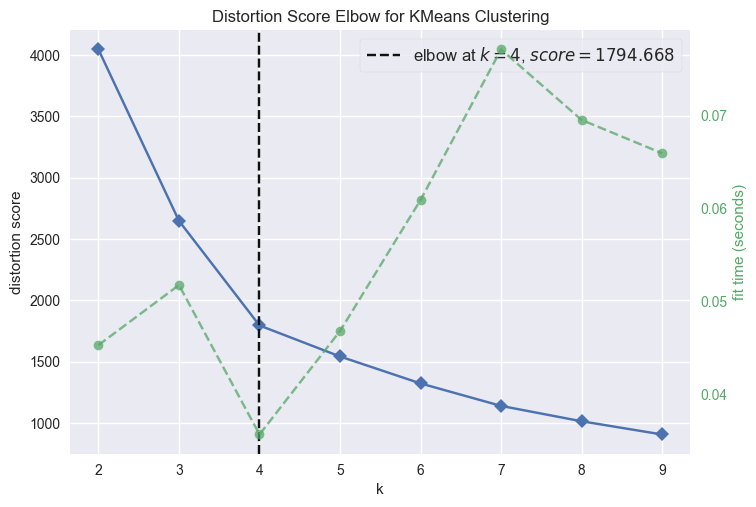

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [225]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# perform KMeans
km = KMeans(init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
visualizer = KElbowVisualizer(km, k=(2,10))

# visualize silhouette plot
visualizer.fit(rfm_scaled)
visualizer.show() 

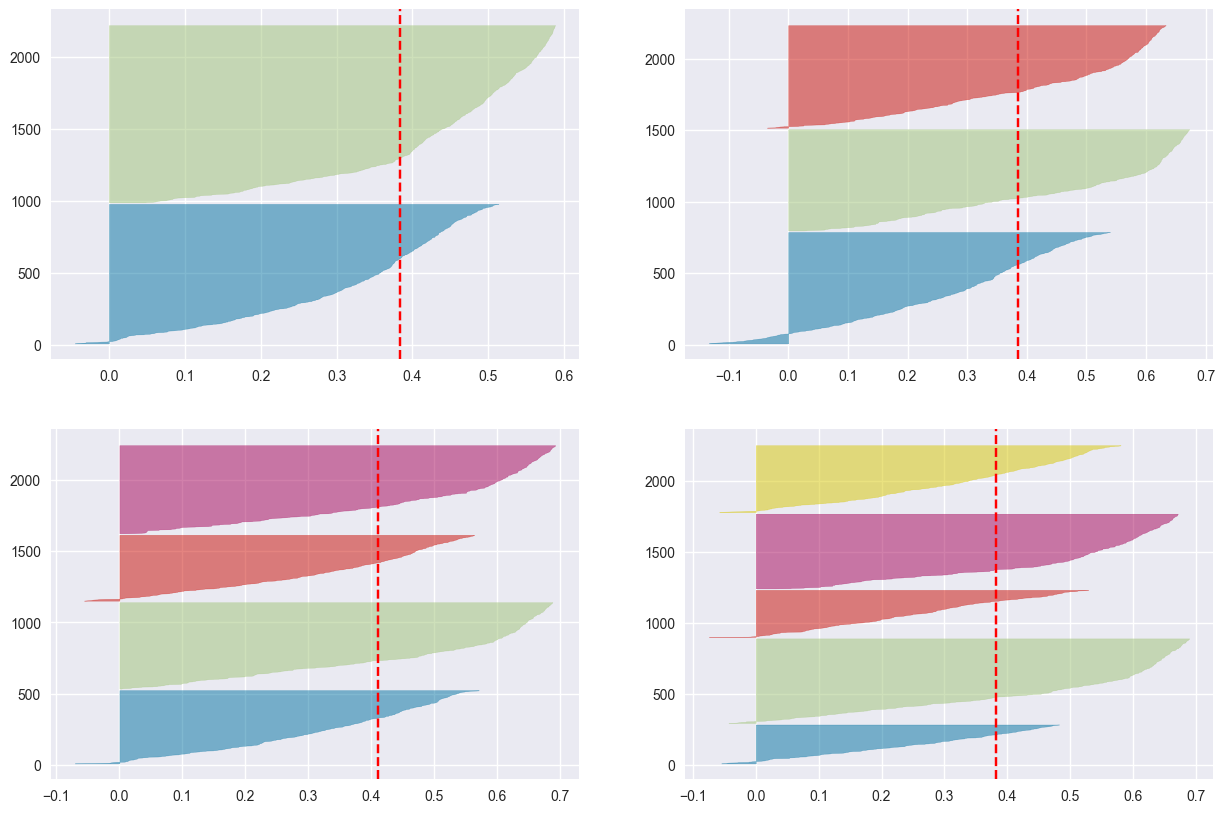

In [226]:
# K = 4 is also the optimal
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,10)) 
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto") 
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod]) 
    visualizer.fit(rfm_scaled)

In [227]:
# choose optimal K = 4 given the Elbow method and Silhouette plot
kmeans = KMeans(4,random_state=0)
y = kmeans.fit_predict(rfm_scaled)
df1['Cluster'] = y
rfm_scaled['Cluster'] = y
dfrfm['Cluster'] = y
df1.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0      High          Alone  58138.0        0         0       58       635   
1      High          Alone  46344.0        1         1       38        11   
2      High       Together  71613.0        0         0       26       426   
3      High       Together  26646.0        1         0       26        11   
4      High       Together  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Complain  age  #ofAcceptedCmp  \
0                  4                  7         0   66               0   
1                  2                  5         0   69               0   
2                 10                  4         0   58               0   
3                  4                  6         0   39               0   
4                  6                  5         0   42               0   

   Dt_Customer_Days  is_parent  Monetary  Frequency  Cluster  
0              3826          0      1441         22        1  
1              3276          1        20          4        0  
2              3475          0       713         20        3  
3              3302          1        45          6        0  
4              3324          1       380         14        2

In [228]:
rfm_scaled.groupby("Cluster").mean()

Recency  Monetary  Frequency
Cluster                               
0        1.947132  1.203061   1.884061
1        3.958696  2.816559   3.419554
2        3.967732  1.206497   1.892743
3        1.934941  2.794809   3.457527

In [229]:
# humanization = {3:"Diamond", 2:"Gold" , 0:"Silver", 1:"Bronze"}
# dfrfm["Cluster"].replace(humanization,inplace=True)
# dfrfm.head()

humanization = {3:"Diamond", 0:"Gold" , 1:"Silver", 2:"Bronze"}
dfrfm["Cluster"].replace(humanization,inplace=True)
dfrfm.head()

Recency  Monetary  Frequency  Cluster
0       58      1441         22   Silver
1       38        20          4     Gold
2       26       713         20  Diamond
3       26        45          6     Gold
4       94       380         14   Bronze

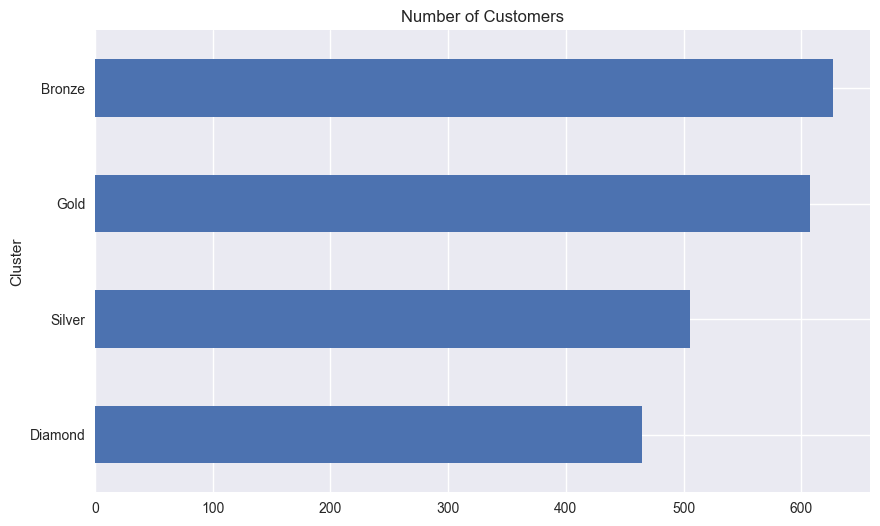

In [230]:
#group by topic and plot rows in the descending order
dfrfm.groupby('Cluster').size().sort_values(ascending=True)\
    .plot(title="Number of Customers", kind='barh',figsize=(10,6))
plt.show()

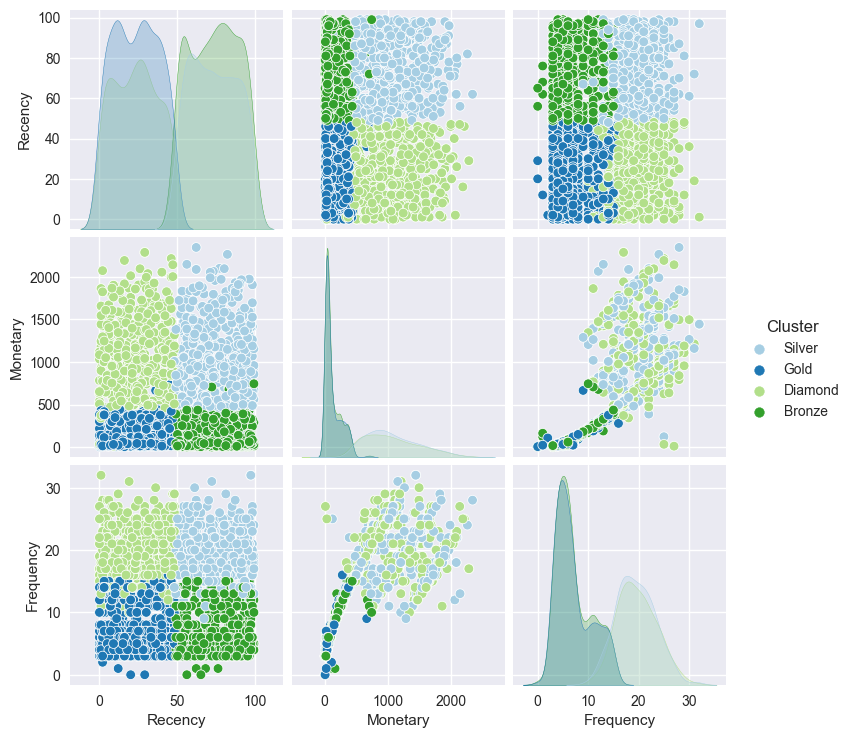

In [231]:
sns.pairplot(dfrfm, hue="Cluster",palette='Paired')
plt.show()

In [239]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [241]:
colors_cluster = ['rgb(178,199,200)','rgb(111,174,215)', 'rgb(59,120,175)','rgb(33,62,120)']
import plotly.express as px
fig = px.scatter_3d(df1, x="Recency",y="Frequency",z="Monetary", color='Cluster',
                    color_discrete_sequence=colors_cluster)
fig.show()

### RFM analysis

#### Features of RFM clusters
Diamond: High Monetary, High Frequency, Low Recency

Gold: High Monetary, High Frequency, High Recency

Silver: Low Monetary, Low Frequency, Low Recency

Bronze: Low Monetary, Low Frequency, High Recency

In [242]:
# dataframe with RFM cluster
df1["Cluster"].replace(humanization,inplace=True)
df1.head(2)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0      High          Alone  58138.0        0         0       58       635   
1      High          Alone  46344.0        1         1       38        11   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   

   NumStorePurchases  NumWebVisitsMonth  Complain  age  #ofAcceptedCmp  \
0                  4                  7         0   66               0   
1                  2                  5         0   69               0   

   Dt_Customer_Days  is_parent  Monetary  Frequency Cluster  
0              3826          0      1441         22  Silver  
1              3276          1        20          4    Gold

In [243]:
# RFM Distribution by Cluster
import plotly.express as px
colors_rfm = ['rgb(179,57,81)',  'rgb(245,138,7)', 'rgb(132,111,192)']
df_rfm_long = pd.melt(frame=df1[['Recency','Monetary','Frequency','Cluster']],id_vars='Cluster')

px.box(df_rfm_long, x='Cluster', y='value',
             title='<b>RFM Distribution by Cluster</b>',
             color='variable', color_discrete_sequence=colors_rfm,
             boxmode='group',points='all')

In [245]:
colors_cluster = ['rgb(178,199,200)','rgb(111,174,215)', 'rgb(59,120,175)','rgb(33,62,120)']
fig = px.scatter(data_frame=df1,x='Income',y='Recency',color='Cluster',color_discrete_sequence=colors_cluster,
                 opacity=0.7,title='<b>Clusters by Income & Monetary</b>')
fig.update_traces(marker_size=10)

#### Whether RFM clusters present certain features among other numerical variables?

In [246]:
# feature summary
df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days', 'is_parent', 'Monetary',
       'Frequency', 'Cluster'],
      dtype='object')

In [247]:
# income distribution by cluster
df_rfm_long = pd.melt(frame=df1[['Income','Cluster']],id_vars='Cluster')
px.box(df_rfm_long, x='Cluster', y='value',
             title='<b>Income Distribution by Cluster</b>',
             color='variable', color_discrete_sequence=colors_rfm,
             boxmode='group')

In [249]:
# age distribution by cluster
df_rfm_long = pd.melt(frame=df1[['age','Cluster']],id_vars='Cluster')
px.box(df_rfm_long, x='Cluster', y='value',
             title='<b>Age Distribution by Cluster</b>',
             color='variable', color_discrete_sequence=colors_rfm,
             boxmode='group')

#### Whether RFM clusters present certain features among other categorical variables?

Text(0.5, 1.0, 'is_parent distribution by cluster')

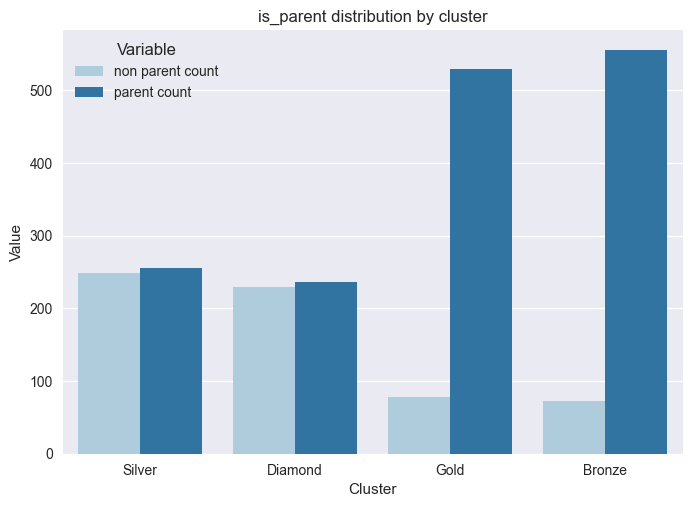

In [250]:
# is_parent distribution by cluster 
temp1 = pd.DataFrame(df1[df1.is_parent==0].Cluster.value_counts().reset_index().rename(columns={'Cluster':'non parent count'}))
temp2 = pd.DataFrame(df1[df1.is_parent==1].Cluster.value_counts().reset_index().rename(columns={'Cluster':'parent count'}))
temp = pd.merge(temp1,temp2,how='inner').rename(columns={'index':'Cluster'})

# melt the dataframe to create a long format
melted_data = pd.melt(temp, id_vars=['Cluster'], var_name='Variable', value_name='Value')

# create a bar plot with Seaborn
sns.barplot(x='Cluster', y='Value', hue='Variable', data=melted_data, palette='Paired')
plt.title('is_parent distribution by cluster')

Text(0.5, 1.0, 'Number of customers complained or not in the last 2 years by Cluster')

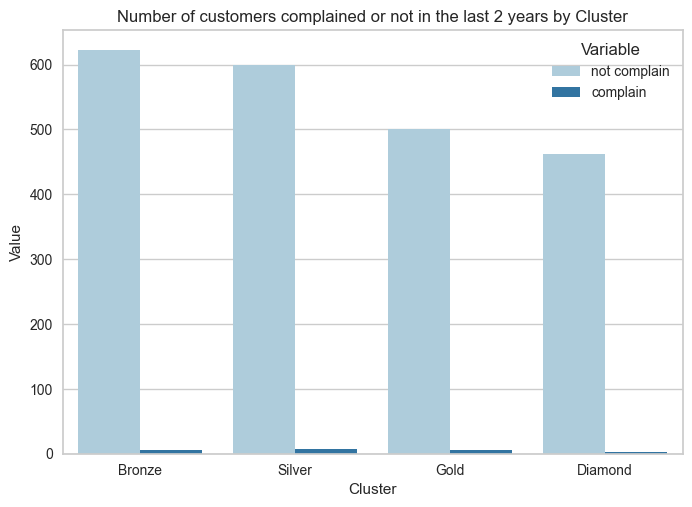

In [172]:
# Number of customers complained or not in the last 2 years by Cluster
temp1 = pd.DataFrame(df1[df1.Complain==0].Cluster.value_counts().reset_index().rename(columns={'Cluster':'not complain'}))
temp2 = pd.DataFrame(df1[df1.Complain==1].Cluster.value_counts().reset_index().rename(columns={'Cluster':'complain'}))
temp = pd.merge(temp1,temp2,how='inner').rename(columns={'index':'Cluster'})

# melt the dataframe to create a long format
melted_data = pd.melt(temp, id_vars=['Cluster'], var_name='Variable', value_name='Value')

# create a bar plot with Seaborn
sns.barplot(x='Cluster', y='Value', hue='Variable', data=melted_data, palette='Paired')
plt.title('Number of customers complained or not in the last 2 years by Cluster')

Text(0.5, 1.0, 'Education distribution by Cluster')

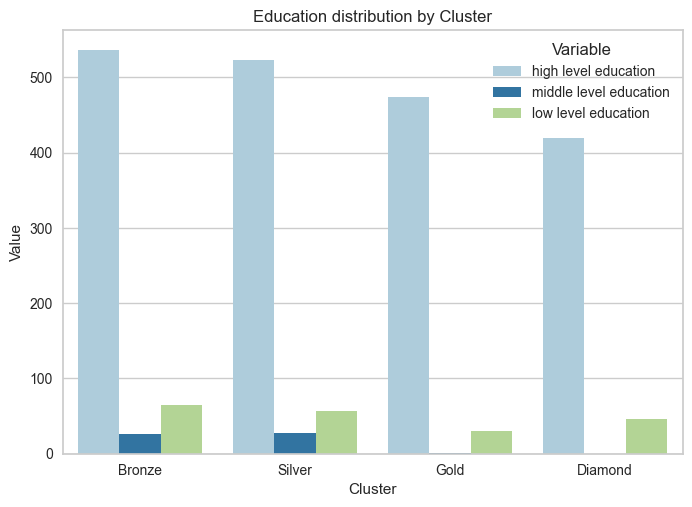

In [173]:
# Education distribution by Cluster
temp1 = pd.DataFrame(df1[df1.Education=='High'].Cluster.value_counts().reset_index().rename(columns={'Cluster':'high level education'}))
temp2 = pd.DataFrame(df1[df1.Education=='Middle'].Cluster.value_counts().reset_index().rename(columns={'Cluster':'middle level education'}))
temp3 = pd.DataFrame(df1[df1.Education=='Low'].Cluster.value_counts().reset_index().rename(columns={'Cluster':'low level education'}))
temp = pd.merge(temp1,temp2,how='outer')
temp = pd.merge(temp,temp3,how='outer').rename(columns={'index':'Cluster'})

# melt the dataframe to create a long format
melted_data = pd.melt(temp, id_vars=['Cluster'], var_name='Variable', value_name='Value')

# create a bar plot with Seaborn
sns.barplot(x='Cluster', y='Value', hue='Variable', data=melted_data, palette='Paired')
plt.title('Education distribution by Cluster')

Text(0.5, 1.0, 'Marital Status distribution by Cluster')

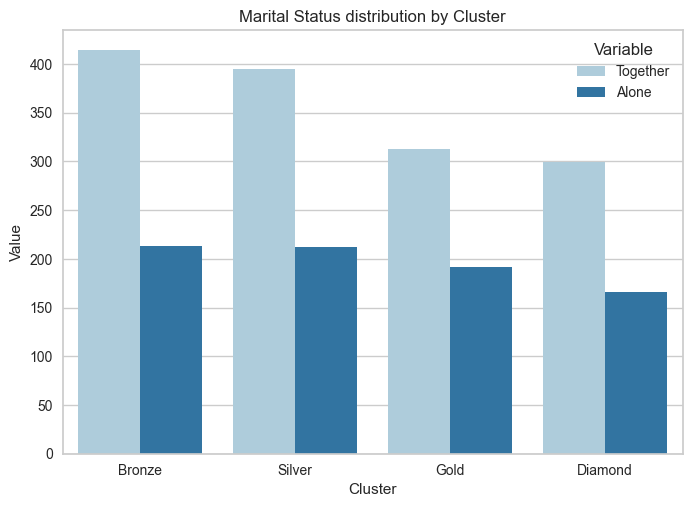

In [176]:
# Marital Status distribution by Cluster
temp1 = pd.DataFrame(df1[df1.Marital_Status=='Together'].Cluster.value_counts().reset_index().rename(columns={'Cluster':'Together'}))
temp2 = pd.DataFrame(df1[df1.Marital_Status=='Alone'].Cluster.value_counts().reset_index().rename(columns={'Cluster':'Alone'}))
temp = pd.merge(temp1,temp2,how='outer').rename(columns={'index':'Cluster'})

# melt the dataframe to create a long format
melted_data = pd.melt(temp, id_vars=['Cluster'], var_name='Variable', value_name='Value')

# create a bar plot with Seaborn
sns.barplot(x='Cluster', y='Value', hue='Variable', data=melted_data, palette='Paired')
plt.title('Marital Status distribution by Cluster')

Text(0.5, 1.0, 'Alone rate by Cluster')

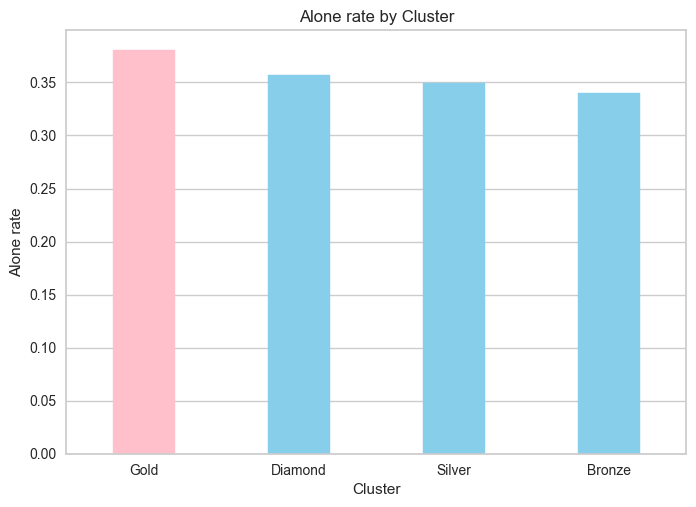

In [189]:
marital = temp
marital['Total'] = marital['Together'] + marital['Alone']
marital['Alone rate'] = marital['Alone']/marital['Total']
# create a bar plot with Seaborn
ax = sns.barplot(x='Cluster', y='Alone rate', data=marital, color='skyblue',
            order=marital.sort_values('Alone rate',ascending=False).Cluster,width=0.4)
# highlight the max
for bar in ax.patches:
    if bar.get_height() > 0.38:
        bar.set_color('pink')    
    else:
        bar.set_color('skyblue')
plt.title('Alone rate by Cluster')